In [ ]:
# 1， 把数据表放到工作目录下

In [1]:
# 打开数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文

data_df = pd.read_csv("simudata.csv",encoding = "GBK")
data_df.head()  #  查看前5条信息 不填参数 n ，默认返回 5 行

,是否按期还款,性别,已婚_未婚,已育_未育,收入,教育水平,英语水平,微博好友数,消费理念
0,1,0,0,1,19823,1,3,36,0.10
1,1,1,1,0,6408,1,3,25,0.65
2,1,0,0,1,10001,1,2,65,0.17
3,1,0,1,0,35078,3,4,43,0.23
4,1,1,1,1,56145,1,3,24,0.86


In [2]:
# 查看数据的属性

# 看数据有多少行，多少列
print("数据的行列个数：",data_df.shape)

# 看数据的列表题是什么
print("数据的列标题：",data_df.columns)

# 知道每一列的数据类型是什么
print("数据的类型：",data_df.dtypes)

# 知道数据的值长什么样子，数据的行缩影长什么样子
print("数据的值：",data_df.values)
print("数据的行索引：",data_df.index)


数据的行列个数： (1000, 9)
数据的列标题： Index(['是否按期还款', '性别', '已婚_未婚', '已育_未育', '收入', '教育水平', '英语水平', '微博好友数',
       '消费理念'],
      dtype='object')
数据的类型： 是否按期还款      int64
性别          int64
已婚_未婚       int64
已育_未育       int64
收入          int64
教育水平        int64
英语水平        int64
微博好友数       int64
消费理念      float64
dtype: object
数据的值： [[ 1.    0.    0.   ...  3.   36.    0.1 ]
 [ 1.    1.    1.   ...  3.   25.    0.65]
 [ 1.    0.    0.   ...  2.   65.    0.17]
 ...
 [ 1.    0.    1.   ...  3.   47.    0.86]
 [ 0.    0.    0.   ...  2.   32.    0.77]
 [ 1.    0.    1.   ...  3.   36.    0.36]]
数据的行索引： RangeIndex(start=0, stop=1000, step=1)


In [ ]:
# 1，定性数据分析

In [24]:

sex_dict = {"男":1,"女":0}
result_dict = {}
while True:
    while True:
        input_v2 = input("\n请输入性别(男/女/e退出)：")
        if input_v2 in ["男","女","e"]:
            break
        else:
            print("无效输入！")
    if input_v2.lower() == "e":
        break

    ## 要求1：统计女性的人数？
    bool_v2 = data_df["性别"] == sex_dict[input_v2];
    female_df = data_df.loc[bool_v2,:]   # 提取女性信息
    female_count = female_df.shape[0]    # 查看女性人数
    print(f"{input_v2}性的总人数：{female_count}")  

    ## 要求2,：统计女性中，能按期还款的人数
    bool_v3 = data_df["是否按期还款"] == 1;  # 按期还款
    Repayment_df = female_df.loc[bool_v3,:]   # 提取按期还款的女性信息
    Repayment_count = Repayment_df.shape[0]    # 查看按期还款的女性人数
    print(f"按期还款的{input_v2}性的总人数：{Repayment_count}") 

    ### 计算女性的还款能力 = 按期还款的人数/总人数
    comp_v2 = np.round(Repayment_count/female_count, 2)
    print(f"{input_v2}性的还款能力为：{comp_v2}")
    result_dict[input_v2]=[female_count,Repayment_count,comp_v2]
print(result_dict)



请输入性别(男/女/e退出)：男
男性的总人数：497
按期还款的男性的总人数：324
男性的还款能力为：0.65

请输入性别(男/女/e退出)：女
女性的总人数：503
按期还款的女性的总人数：343
女性的还款能力为：0.68

请输入性别(男/女/e退出)：e
{'男': [497, 324, 0.65], '女': [503, 343, 0.68]}


In [20]:
## 循环以上代码，将三个结果（总人数，能还款人数，还款能力）放到字典result_dict中
## 字典格式：{“男”：[497,243,0.65]，“女”：[503,343,0.68]}

sex_dict = {"男":1,"女":0}
result_dict = {}

for i_v2 in sex_dict:
    ## 要求1：统计女性的人数？
    bool_v2 = data_df["性别"] == sex_dict[i_v2];
    female_df = data_df.loc[bool_v2,:]   # 提取女性信息
    female_count = female_df.shape[0]    # 查看女性人数
    # print(f"{i_v2}性的总人数：{female_count}")  

    ## 要求2,：统计女性中，能按期还款的人数
    bool_v3 = data_df["是否按期还款"] == 1;  # 按期还款
    Repayment_df = female_df.loc[bool_v3,:]   # 提取按期还款的女性信息
    Repayment_count = Repayment_df.shape[0]    # 查看按期还款的女性人数
    # print(f"按期还款的{i_v2}性的总人数：{Repayment_count}") 

    ### 计算女性的还款能力 = 按期还款的人数/总人数
    comp_v2 = np.round(Repayment_count/female_count, 2)
    # print(f"{i_v2}性的还款能力为：{comp_v2}")
    
    result_dict[i_v2]=[female_count,Repayment_count,comp_v2]
print(result_dict)


{'男': [497, 324, 0.65], '女': [503, 343, 0.68]}


In [26]:
result_dict
# 将统计结果转换成表格
use_df = pd.DataFrame(result_dict,index=["总人数","可还款人数","还款能力"])
use_df

,男,女
总人数,497.00,503.00
可还款人数,324.00,343.00
还款能力,0.65,0.68


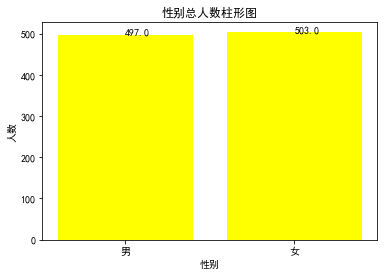

In [32]:
# 绘制图形
# 导入绘图命令
import matplotlib.pyplot as plt


# 准备数据
x_data = use_df.columns
y_data = use_df.loc["总人数",:]


# 绘制图形
plt.bar(x_data, y_data, width = 0.8, color = "yellow")

for i in range(len(x_data)):
    plt.text(x_data[i], y_data[i], y_data[i])

plt.title("性别总人数柱形图")
plt.xlabel("性别")
plt.ylabel("人数")

# 显示保存图形
plt.savefig("性别统计结果图.jpg")
plt.show()



请输入统计关键字(性别/教育水平/英语水平/已婚_未婚/已育_未育/e退出)：性别

请输入性别(男|女，按e退出）：男
性别为男的总人数：497
按期还款的性别为男的总人数：324
性别为男的还款能力为：0.65

请输入性别(男|女，按e退出）：女
性别为女的总人数：503
按期还款的性别为女的总人数：343
性别为女的还款能力为：0.68

请输入性别(男|女，按e退出）：e


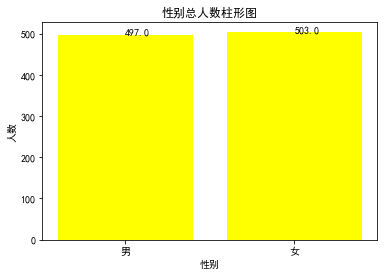

程序正常

请输入统计关键字(性别/教育水平/英语水平/已婚_未婚/已育_未育/e退出)：e
 *** 程序已退出！ 


In [1]:
# 函数化定性数据统计
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "SimHei"  # 正常显示中文

# 函数1：统计函数
def stat_def(data_df,key_v2,key_dict):
    sex_dict = key_dict
    result_dict = {}  # 存放结果
    while True:
        while True:
            input_v2 = input(f'\n请输入{key_v2}({"|".join(list(key_dict.keys()))}，按e退出）：')
            if input_v2 in list(key_dict.keys()) or input_v2 == "e":
                break
            else:
                print("无效输入！")
        if input_v2.lower() == "e":
            break

        ## 要求1：统计女性的人数？
        bool_v2 = data_df[key_v2] == sex_dict[input_v2];
        female_df = data_df.loc[bool_v2,:]   # 提取女性信息
        female_count = female_df.shape[0]    # 查看女性人数
        print(f"{key_v2}为{input_v2}的总人数：{female_count}")  

        ## 要求2,：统计女性中，能按期还款的人数
        bool_v3 = data_df["是否按期还款"] == 1;  # 按期还款
        Repayment_df = female_df.loc[bool_v3,:]   # 提取按期还款的女性信息
        Repayment_count = Repayment_df.shape[0]    # 查看按期还款的女性人数
        print(f"按期还款的{key_v2}为{input_v2}的总人数：{Repayment_count}") 

        ### 计算还款能力 = 按期还款的人数/总人数
        comp_v2 = np.round(Repayment_count/female_count, 2)
        print(f"{key_v2}为{input_v2}的还款能力为：{comp_v2}")
        result_dict[input_v2]=[female_count,Repayment_count,comp_v2]
    return result_dict


# 函数2：绘图函数
def matp_def(result_dict,key_v2):
    
    use_df = pd.DataFrame(result_dict,index=["总人数","可还款人数","还款能力"])
    
    # 准备数据
    x_data = use_df.columns
    y_data = use_df.loc["总人数",:]

    # 绘制图形
    plt.bar(x_data, y_data, width = 0.8, color = "yellow")

    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], y_data[i])

    plt.title(f"{key_v2}总人数柱形图")
    plt.xlabel(f"{key_v2}")
    plt.ylabel("人数")

    # 显示保存图形
    plt.savefig(f"{key_v2}统计结果图.jpg")
    plt.show()

# 主函数
def main():
    data_df = pd.read_csv("simudata.csv",encoding = "GBK")  # 打开数据表
    
    while True:
        input_v2 = input("\n请输入统计关键字(性别/教育水平/英语水平/已婚_未婚/已育_未育/e退出)：")
        if input_v2.lower() == "e":
            break
        elif input_v2 in ["性别","教育水平","英语水平","已婚_未婚","已育_未育","e","E"]:
            # 声明关键字值字典
            sex_dict = {"男":1,"女":0}                             # 性别
            edu_dict = {"高中":1, "本科":2, "研究生":3, "博士":4}  # 教育水平
            english_dict = {"四级以下":1, "四级":2, "六级":3, "六级以上":4} # 英语水平
            marriage_dict = {"未婚":0, "已婚":1}                    # 婚姻
            birth_dict = {"未育":0, "已育":1}                      # 生育
            
            # 选择关键字值字典
            key_dict = {"性别":sex_dict, "教育水平":edu_dict, "英语水平":english_dict, "已婚_未婚":marriage_dict, "已育_未育":birth_dict}

            # 调用函数
            result_dict = stat_def(data_df,input_v2,key_dict[input_v2])  # 统计函数
            matp_def(result_dict,input_v2)   # 绘图函数
            print("程序正常")  
        else :
            print("无效输入，请输入已有的关键字！")
    
    print(" *** 程序已退出！ ")

if __name__=="__main__":
    main()
